In [2]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


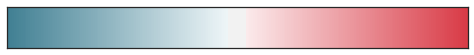

In [3]:
# base libs
import numpy as np
import pandas as pd

pd.options.display.max_columns = 500
pd.options.display.max_rows = 100

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='white')
cmap = sns.choose_diverging_palette(as_cmap=True)

In [4]:
%aimport dasci.data.explore
%aimport dasci.model.common

import dasci.data.explore as expl
import dasci.model.common as model

In [5]:
df = pd.read_pickle(expl.full_path_name(r'output\train-fe-basic.pickle'))

# Modeling

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVR, SVR

In [9]:
df_encoded = model.encode(df)

X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

numerical_features = df.select_dtypes(exclude = ["object"]).columns.tolist()
numerical_features.remove("SalePrice")

scaler = StandardScaler()
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
print(scaler.scale_)
X_test.loc[:, numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

regression = LinearSVR(random_state=0)

Cs = [0.001, 0.01, 0.1, 1, 10, 30]
epsilons = [0, 0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'epsilon' : epsilons}
grid_search = GridSearchCV(regression, param_grid, cv=7)
grid_search.fit(X_train, y_train)

print(f"parameters: {grid_search.best_params_}")

py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the n

NameError: name 'rmse_cv' is not defined

C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\s

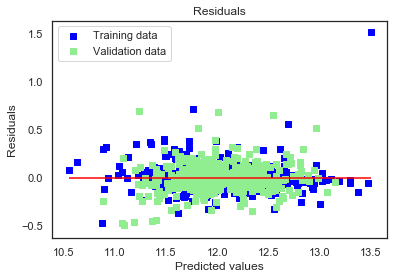

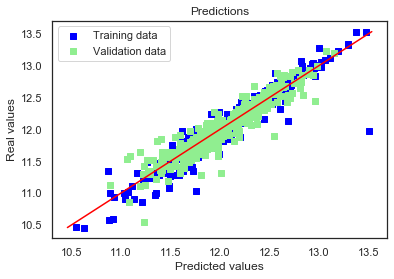

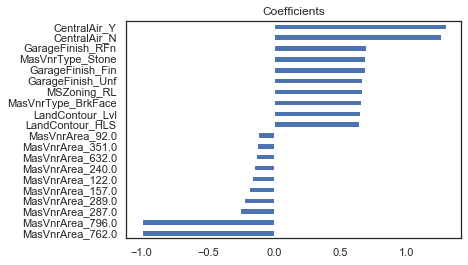

In [11]:
print(f"RMSE on Training set : {model.rmse_cv(grid_search.best_estimator_, X_train, y_train)}") 
print(f"RMSE on Test set : {model.rmse(y_test, grid_search.predict(X_test))}")

model.plot_residual(grid_search.predict(X_train), y_train, grid_search.predict(X_test), y_test)
model.plot_predictions(grid_search.predict(X_train), y_train, grid_search.predict(X_test), y_test)
model.plot_coef(pd.Series(grid_search.best_estimator_.coef_, index = X_train.columns))

parameters: {'C': 10, 'epsilon': 0.01, 'gamma': 0.001}
[0.16058991 0.1202568  0.11085689 0.1383827  0.10067402]
RMSE on Training set : 0.12615206380121963
RMSE on Test set : 0.11428408515059023


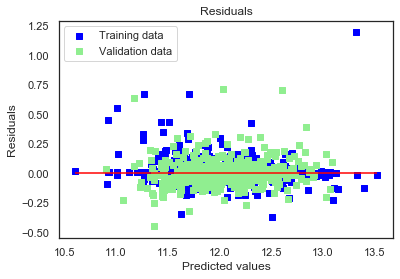

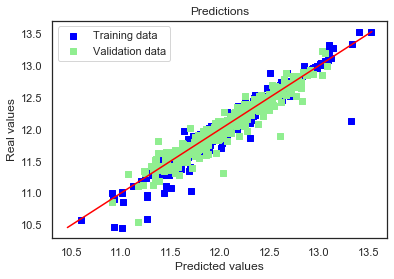

In [13]:
regression = SVR(kernel='rbf')

Cs = [0.01, 0.1, 1, 10]
epsilons = [0, 0.001, 0.01, 0.1]
gammas =  [0.0001, 0.001, 0.01]
param_grid = {'C': Cs, 'epsilon': epsilons, 'gamma': gammas}
grid_search = GridSearchCV(regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"parameters: {grid_search.best_params_}")

print(f"RMSE on Training set : {model.rmse_cv(grid_search.best_estimator_, X_train, y_train)}") 
print(f"RMSE on Test set : {model.rmse(y_test, grid_search.predict(X_test))}")

model.plot_residual(grid_search.predict(X_train), y_train, grid_search.predict(X_test), y_test)
model.plot_predictions(grid_search.predict(X_train), y_train, grid_search.predict(X_test), y_test)